In [ ]:
import pandas as pd
import seaborn as sns #chart를 그리는 데 이용
import numpy as np #여기서는 사용하지 않음
import matplotlib.pyplot as plt

#notebook안에 plot을 그리도록 함. 근데 vscode에서는 작동을 안 하는 것 같으니 그냥 plt.show() 명령어 이용
# %matplotlib inline

In [3]:
#data loading
df = pd.read_csv('single_family_home_values.csv')

# 1. Cleaning Data

## 1.1. 기본적인 정보들을 다루는 방법

In [4]:
df.head(5) #첫 5개의 rows를 보여줌

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df.shape #rows와 columns의 갯수를 알려줌

(15000, 18)

In [7]:
df.info() #columns에 대한 정보가 요약됨. 결측값의 갯수와 열의 데이터 유형을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [8]:
df.describe() #모든 숫자값에 대한 통계값을 제공

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


## 1.2.결측값을 다루는 방법

In [9]:
fill0_df = df.fillna(0) #결측값을 0으로 채움
fill0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    15000 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [10]:
fillmean_df = df.fillna(df.mean(numeric_only=True))
fillmean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [11]:
dropped_df = df.dropna() #결측값이 있는 행을 삭제하는 방법
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11078 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11078 non-null  int64  
 1   address          11078 non-null  object 
 2   city             11078 non-null  object 
 3   state            11078 non-null  object 
 4   zipcode          11078 non-null  int64  
 5   latitude         11078 non-null  float64
 6   longitude        11078 non-null  float64
 7   bedrooms         11078 non-null  int64  
 8   bathrooms        11078 non-null  float64
 9   rooms            11078 non-null  int64  
 10  squareFootage    11078 non-null  int64  
 11  lotSize          11078 non-null  int64  
 12  yearBuilt        11078 non-null  float64
 13  lastSaleDate     11078 non-null  object 
 14  lastSaleAmount   11078 non-null  int64  
 15  priorSaleDate    11078 non-null  object 
 16  priorSaleAmount  11078 non-null  float64
 17  estimated_value  

## 1.3. 분석 가능한 데이터 만들기

In [12]:
dropped_df[['estimated_value','yearBuilt','priorSaleAmount']].head(2)

,estimated_value,yearBuilt,priorSaleAmount
0,239753,2003.0,165700.0
3,494073,1956.0,0.0


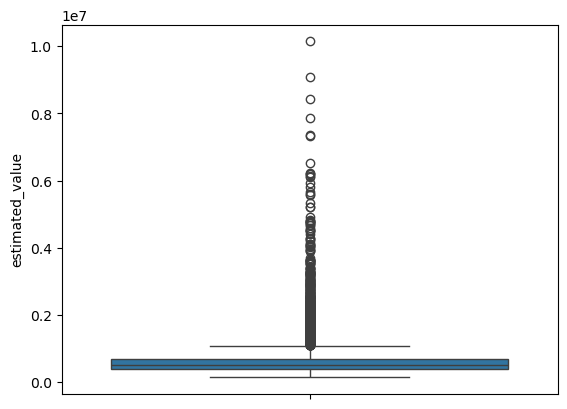

In [13]:
sns.boxplot(dropped_df.estimated_value) #극단치를 확인하기 위해 그래프로 표시
plt.show()

dropped_df.estimated_value <= 800000를 이용하면 각 행에 대해 True, False의 boolean 값으로 return됨
-> dropped_df[dropped_df.estimated_value]는 []안이 True인 행만 return하겠다는 의미가 되니 이를 이용해 데이터프레임을 슬라이싱할 수 있음

In [14]:
df = dropped_df[dropped_df.estimated_value <= 1000000] #df라는 변수명에 재할당

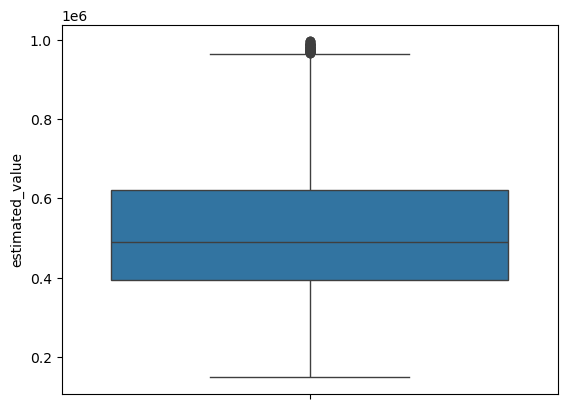

In [15]:
sns.boxplot(df.estimated_value)
plt.show()

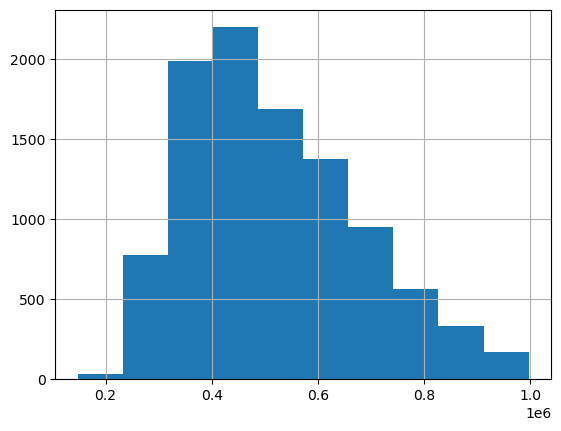

In [16]:
df.estimated_value.hist()
plt.show()

In [17]:
df.zipcode.unique() #zipcode를 확인하기 위함

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

In [24]:
#여러가지 조건을 추가해서 filter out noise하고 df를 slicing할 수 있음
df[(df.estimated_value <= 1000000) & (df.yearBuilt > 2013) & (df.zipcode == 80209)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,2010-11-29,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,2007-01-03,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,2007-02-02,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,1993-07-15,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,2007-08-22,435000.0,709102
13812,39708952,611 S Washington St,Denver,CO,80209,39.705403,-104.979580,3,4.0,10,2090,4690,2014.0,2015-03-09,825000,2013-07-19,325500.0,994114
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,2006-05-11,511000.0,869769
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


# 2. Statistics

열 간의 상관관계를 알아보는 방법

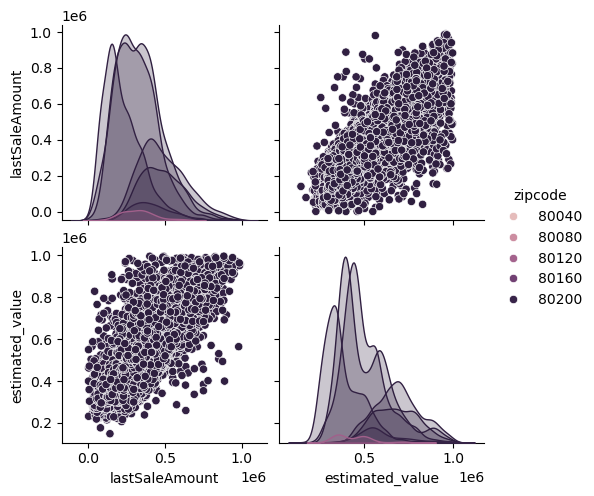

In [57]:
# 열 간의 상관관계를 알아보는 방법
df = df[(df.lastSaleAmount < 1000000)] #그래프 확인해보고 극단치 제거
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode') #hue 옵션을 이용해 zipcode별로 알아보기 쉽게 만듦
plt.show()

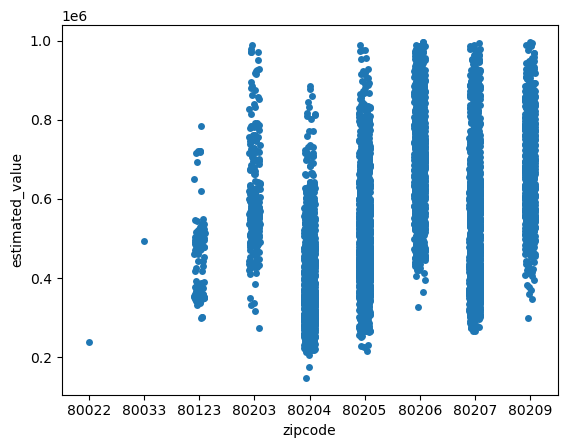

In [ ]:
# zipcode에 근거하여 분포를 알 수 있게 도와줌
sns.stripplot(x=df.zipcode, y=df.estimated_value)
plt.show()

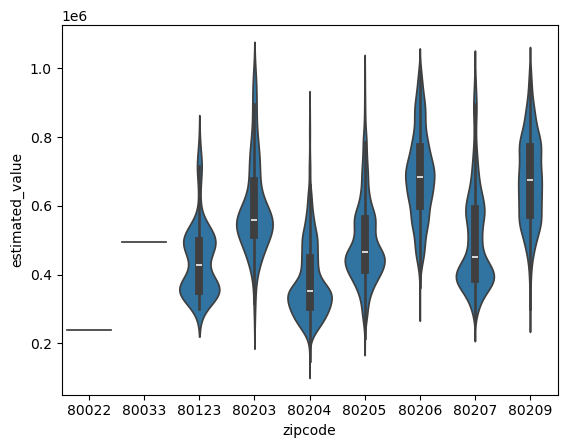

In [36]:
# 위의 그래프와 같은 내용을 다른 방법으로 표현
sns.violinplot(x=df.zipcode, y=df.estimated_value)
plt.show()

정리 :
* 데이터가 적을 때: sns.stripplot()으로 개별 값을 시각적으로 쉽게 파악할 수 있음
* 데이터가 많을 때: sns.violinplot()이 밀도와 분포를 더 명확하게 보여줌.

In [ ]:
# 새로운 열 추가하는 방법
df['new_column'] = 1
df.head(3)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_column
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,1
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,1


In [47]:
display(df.info())
#문제 상황 : lastSaleDate와 priorSaleDate가 object형태이기 때문에 다루기가 까다로움
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate) #datetime으로 바꿔서 재할당
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate) #datetime으로 바꿔서 재할당

<class 'pandas.core.frame.DataFrame'>
Index: 10053 entries, 0 to 14996
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10053 non-null  int64         
 1   address          10053 non-null  object        
 2   city             10053 non-null  object        
 3   state            10053 non-null  object        
 4   zipcode          10053 non-null  int64         
 5   latitude         10053 non-null  float64       
 6   longitude        10053 non-null  float64       
 7   bedrooms         10053 non-null  int64         
 8   bathrooms        10053 non-null  float64       
 9   rooms            10053 non-null  int64         
 10  squareFootage    10053 non-null  int64         
 11  lotSize          10053 non-null  int64         
 12  yearBuilt        10053 non-null  float64       
 13  lastSaleDate     10053 non-null  datetime64[ns]
 14  lastSaleAmount   10053 non-null  int64     

None

In [ ]:
df['lastSaleYear'] = df.lastSaleDate.dt.year
df['priorSaleYear'] = df.priorSaleDate.dt.year
df['btwSaleYear'] = df.lastSaleDate.dt.year-df.priorSaleDate.dt.year #두 판매기간의 차이를 구하는 열을 추가할 수 있음
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_column,lastSaleYear,priorSaleYear,btwSaleYear
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,1,2009,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1,2008,2008,0


In [ ]:
# 상관계수 다루기
df.corr(numeric_only=True).loc['estimated_value',:].sort_values(ascending=False)
# 가장 상관계수가 높은 항목은 lastSaleAmount임을 확인할 수 있음

estimated_value    1.000000
lastSaleAmount     0.772034
squareFootage      0.690384
bathrooms          0.651858
rooms              0.582078
priorSaleAmount    0.570542
bedrooms           0.358359
longitude          0.234440
id                 0.151425
zipcode            0.109765
btwSaleYear        0.087908
lastSaleYear       0.039971
priorSaleYear     -0.059026
lotSize           -0.075173
latitude          -0.199382
yearBuilt         -0.257863
new_column              NaN
Name: estimated_value, dtype: float64

# 3. 데이터 마이닝 실제 연습

그룹별로 묶어서 출력하는 방법

In [ ]:
df.groupby('zipcode').estimated_value.mean()
#mean이외에도 median, max, min등을 추출할 수 있음
# df.groupby(['zipcode', 'yearBuilt']).estimated_value.mean()
# series 타입이기 때문에 데이터프레임으로 다룰려면 변경 필요
df2 = df.groupby(['zipcode']).estimated_value.mean().reset_index() #데이터프레임으로 변경
df2.columns = ['zipcode', 'mean_value'] #열 이름을 새롭게 정의
df2

,zipcode,mean_value
0,80022,239753.000000
1,80033,494073.000000
2,80123,442041.557377
3,80203,596921.813492
4,80204,381987.303743
5,80205,493764.323421
6,80206,687289.934902
7,80207,501332.731973
8,80209,675992.140553


In [ ]:
# 기존 dateframe의 모양 확인
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_column,lastSaleYear,priorSaleYear,btwSaleYear
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,1,2009,2004,5
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,1,2008,2008,0


In [ ]:
df3 = pd.merge(df, df2, on='zipcode', how='left') #zipcode를 기준으로 병합. LEFT JOIN 진행
df3.head(2)
#estimated_value_y로 해서 새로운 열이 생긴 것을 확인할 수 있음(df2에서 각 열 이름을 새롭게 정의해서 이제는 아님)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,...,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,new_column,lastSaleYear,priorSaleYear,btwSaleYear,mean_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,...,2009-12-17,75000,2004-05-13,165700.0,239753,1,2009,2004,5,239753.0
1,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,...,2008-12-02,185000,2008-06-27,0.0,494073,1,2008,2008,0,494073.0
